# Data Exploration

In any data modeling exercise, it  is good to have a basic understanding of 
the data characteristics and ensure that it is inline with our expectations. 

In particular, the main items of interest to look for include:

+ Size and schema
    * number of  instances and features
    * feature names and data types (numeric, ordinal, categorical, text)    
+ Univariate feature and target summaries
    * distributional properties of features 
    * skew in target distribution
    * prevalence of missing, outlier, or junk values
+ Target-feature dependencies
    * distributional properties of features conditioned on the target
    

Today we will focus on feature representation and visual exploration.
    
    

In [1]:
# import sys
# # note: Python versions before 3.3 don't have sys.base_prefix
# # if you're in virtual environment, this will print to the virtual env's folder, and it this will return TRUE
# print(sys.prefix)
# "VIRTUAL_ENV" in os.environ

In [2]:
import sklearn

In [3]:
# Essential packages

# This line enables inline plots within jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import pandas.util.testing as tm

C:\Users\blain\AppData\Local\Temp\ipykernel_1848\4250247960.py:11: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Let's start with data loading
# Here I will use Boston house prices dataset. It is available through sklearn datasets.
# You can also download it from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

## otherwise 
# df = pd.read_csv('housing_dataset.csv', header=True)

C:\Users\blain\Documents\Git\AI_Professional_Development\ai_env\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

## Size and Schema

First, we will try to get a sense of the size and the column types

In [5]:
# data size
df.shape

(506, 14)

In [6]:
# data schema
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [7]:
# top few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# summary of the data
df.describe(include='all',percentiles=[])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Bar charts

##### Bar chart is a simple way to describe the frequency distribution for categorical variables.

We will use <span style="font-family:Comic Sans MS">matplotlib</span>  and/or <span style="font-family:Comic Sans MS">pandas</span> plotting, which provides convenient plotting functions from df using <span style="font-family:Comic Sans MS">matplotlib</span>.

In [9]:
# RAD is a categorical or ordinal feature since it takes integer values.
val_counts = df['RAD'].value_counts()
print('Value counts')
for k, v in val_counts.items():
    print(k, v)

Value counts
24.0 132
5.0 115
4.0 110
3.0 38
6.0 26
2.0 24
8.0 24
1.0 20
7.0 17


Text(0, 0.5, 'frequency')

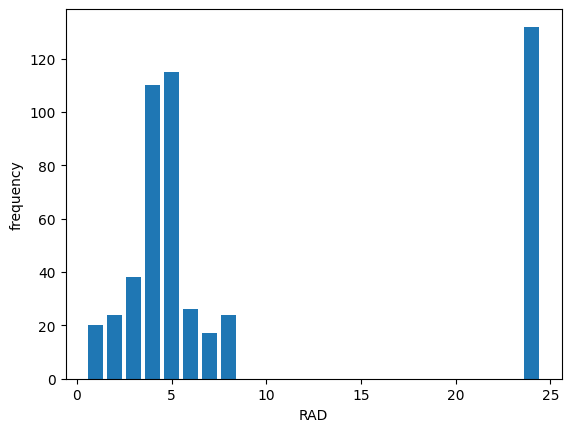

In [10]:
values, counts = val_counts.index, val_counts
plt.bar(values, counts)
plt.xlabel('RAD')
plt.ylabel('frequency')

##  Histograms

We can plot histogram for continuous valued features as well. We would have to select bin size to discretize the continuous valuesd data. Let's look at the distribution of <span style="font-family:Comic Sans MS">target</span> in the data.

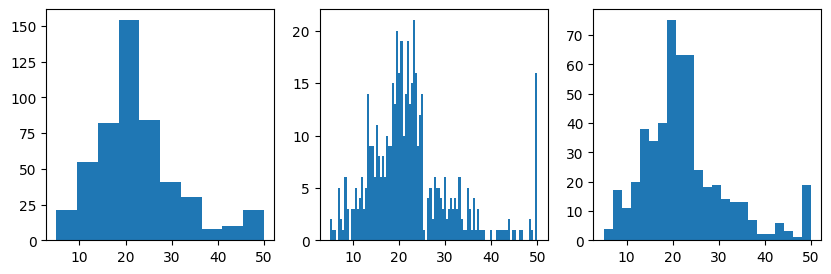

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].hist(df['target'])
ax[1].hist(df['target'], bins=100)
ax[2].hist(df['target'], bins='auto')
plt.show()

We could also plot the histogram directly from df:

<AxesSubplot: >

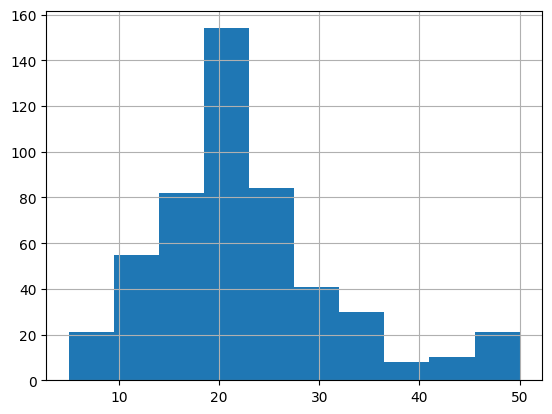

In [12]:
df['target'].hist()

##  Boxplots

#### Let's take a look at another popular way of visualizing and comparing data distribution for numerical features.

Let's load another dataset - IRIS: a flower dataset

In [13]:
from sklearn.datasets import load_iris

dataset_iris = load_iris()
iris = pd.DataFrame(dataset_iris.data, columns=dataset_iris.feature_names)
iris['target'] = dataset_iris.target

In [14]:
# data size
iris.shape

(150, 5)

In [15]:
# data schema
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [16]:
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Values (in cm)')

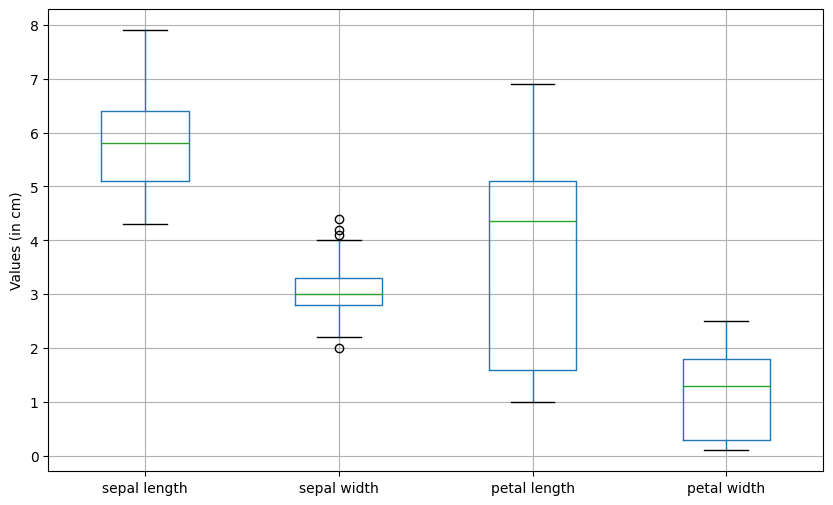

In [17]:
# comparing features
plt.figure(figsize=(10, 6))
iris[['sepal length', 'sepal width', 'petal length', 'petal width']].boxplot()
plt.ylabel('Values (in cm)')

In [18]:
iris['target'].unique()

array([0, 1, 2])

Text(0, 0.5, '(petal width) Values (in cm)')

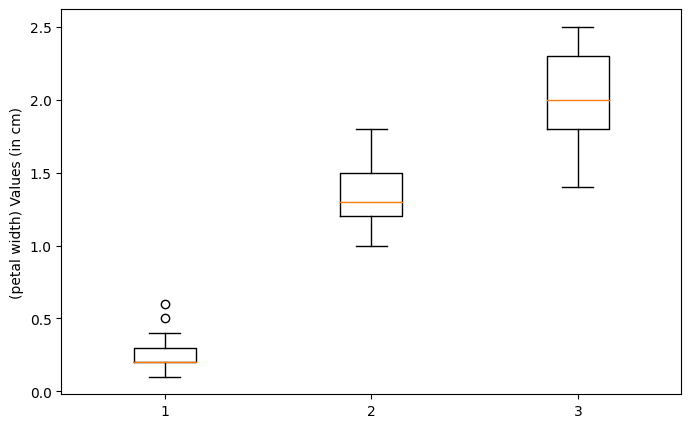

In [19]:
# comparing classes 
# let's take a look at the box plots of target for features "petal width"
plt.figure(figsize=(8, 5))
pw_0 = iris[iris['target'] == 0]['petal width']
pw_1 = iris[iris['target'] == 1]['petal width']
pw_2 = iris[iris['target'] == 2]['petal width']

plt.boxplot([pw_0, pw_1, pw_2])
plt.ylabel('(petal width) Values (in cm)')

##  Scatter plots

#### Scatter plots help us visualize data in 2D. 
Relationship between every two features could be uncovered through scatter plots.

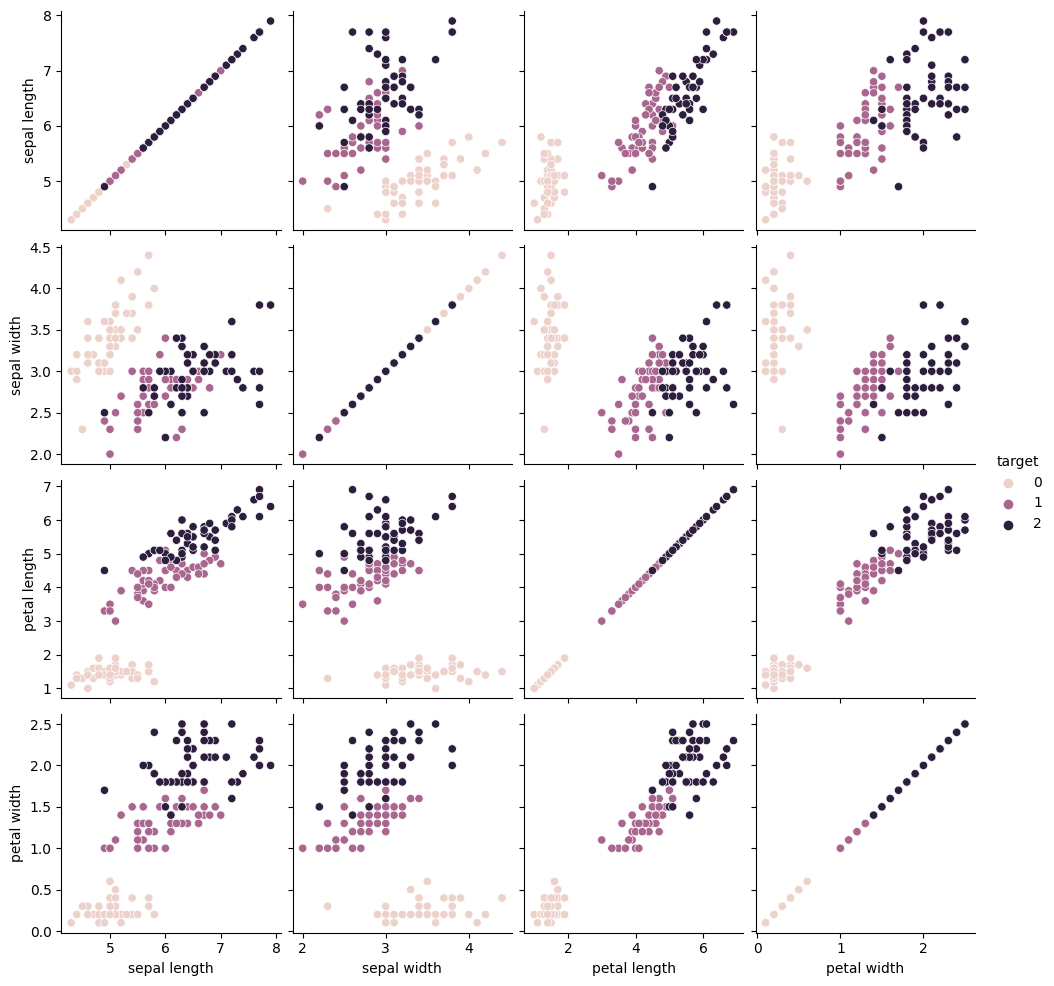

In [20]:
g = sns.pairplot(data=iris, hue='target', vars=['sepal length', 'sepal width', 'petal length', 'petal width'],
            diag_kind=None)# , plot_kws={'scatter_kws': {'alpha': 0.3}})
g.set(alpha=0.1)

## You can also use pandas to do this
#grr = pd.plotting.scatter_matrix(iris, c=iris['target], figsize=(15, 15), marker='o', s=60, alpha=.8)

Let's get back to Boston housing data again.

In [21]:
features = [c for c in df.columns if c not in ('target',)]

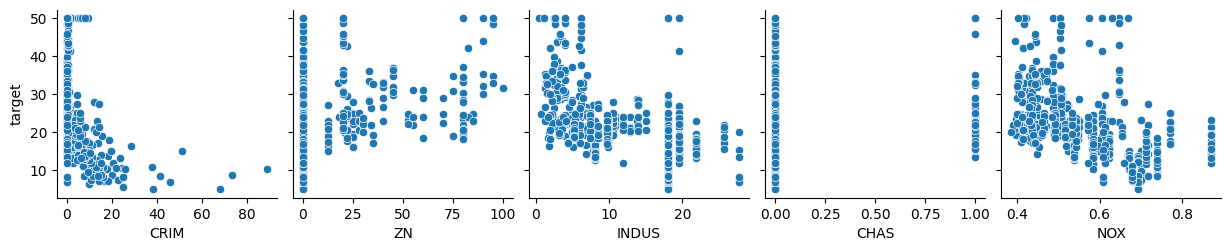

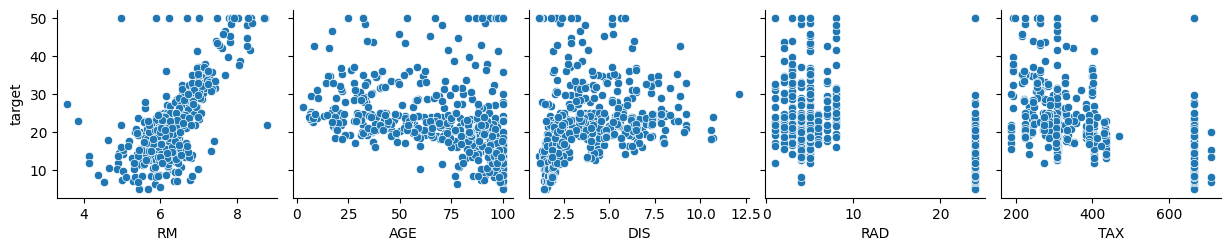

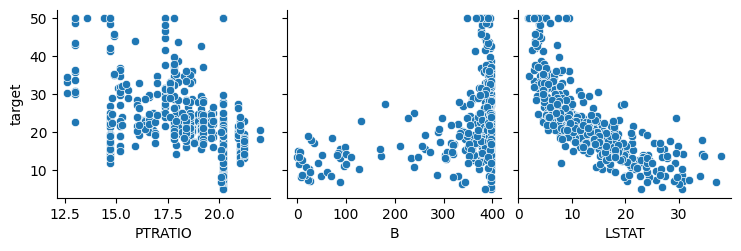

In [22]:
sns.pairplot(data=df, x_vars=features[:5], y_vars='target')
sns.pairplot(data=df, x_vars=features[5:10], y_vars='target')
sns.pairplot(data=df, x_vars=features[10:], y_vars='target')

##  Heatmaps
A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

<AxesSubplot: >

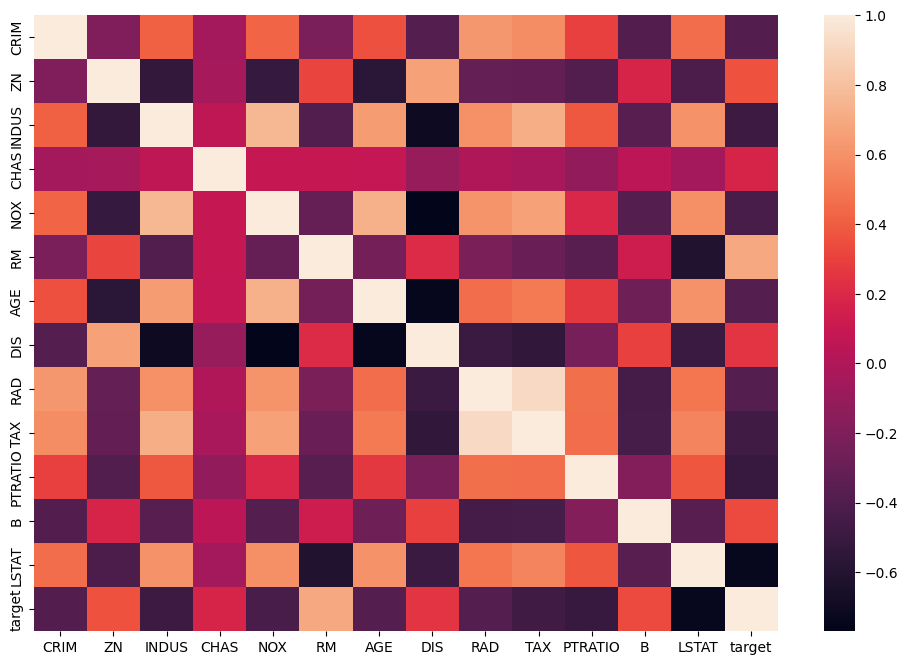

In [23]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
# pass the axis to draw on
sns.heatmap(corr, ax=ax)

##  Parallel Coordinates

#### What if we would like to visualize more than 2D?  Parallel plots come to rescue!

In [24]:
from pandas.plotting import parallel_coordinates  # pandas provides the method

<AxesSubplot: >

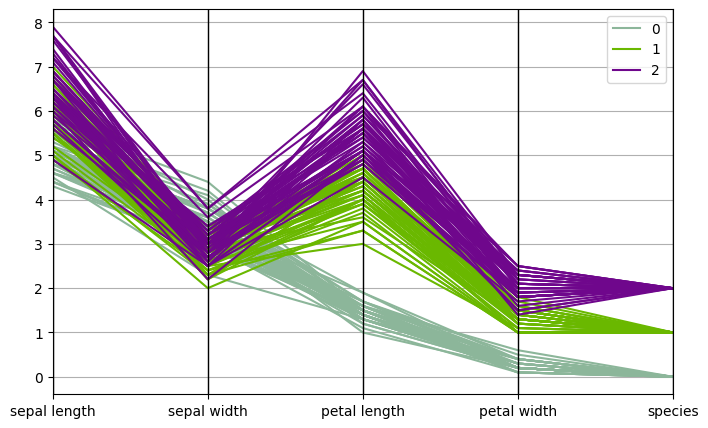

In [25]:
plt.figure(figsize=(8, 5))
iris['species'] = iris['target']
parallel_coordinates(iris, 'target')

##  Radar Plots

#### Another way to visualize data in >2D is to use radar plot. Python doesn't have a library for this. So we include below a block of code that can be used to plot radar plots for your convenience.

In [26]:
from math import pi

In [27]:
# let's just retain the columns we are interested in
iris = iris.drop('species', axis = 1)
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [28]:
type(iris['target'][0])

numpy.int32

In [29]:
num_samples = iris.shape[0]
num_samples

150

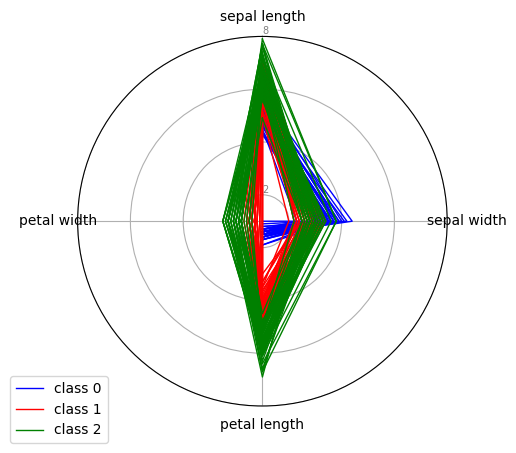

In [30]:
# ------- Setup the chart background
# number of variables
categories=[c for c in iris.columns if c not in ('target', 'species')]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8], ['2', '4', '6', '8'], color="grey", size=7)
plt.ylim(1,8)

# plot data corresponding to each class
 
# Plot each individual = each line of the data
num_samples = iris.shape[0]
if_first = [True, True, True]
for i in range(num_samples):
    if iris.loc[i]['target'] == 0:
        # lines corresponding to target = 0
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[0]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='b', label="class 0")
            if_first[0] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='b')
        # ax.fill(angles, values, 'b', alpha=0.1) -- if you want to fill the plot
    
    elif iris.loc[i]['target'] == 1:
        # lines corresponding to target = 1
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[1]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='r', label="class 1")
            if_first[1] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='r')
    
    elif iris.loc[i]['target'] == 2:
        # lines corresponding to target = 2
        values=iris.loc[i].drop('target').values.flatten().tolist()
        values += values[:1]
        if if_first[2]:
            ax.plot(angles, values, linewidth=1, linestyle='solid', color='g', label="class 2")
            if_first[2] = False
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='g')
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


##  Contour Plots
It is used for visualizing a 3D surface in two dimensions. Each contour line consists of points with same constant value.

In [31]:
iris = sns.load_dataset("iris")
setosa = iris.loc[(iris.species == "setosa")]
virginica = iris.loc[(iris.species == "virginica")]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=False, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

# Data Transformations

In [ ]:
df.head()

## Feature scaling

In [ ]:
# from housing data
plt.scatter(df['CRIM'], df['AGE'])

In [ ]:
# Essential imports
# imports for creating custom sklearn transformers
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# standard scaler
df_s = pd.DataFrame(StandardScaler().fit_transform(df[['CRIM', 'AGE']]))
df_s.columns = ['CRIM', 'AGE']

In [ ]:
plt.scatter(df_s['CRIM'], df_s['AGE'])

In [ ]:
# MinMax scaler
df_mm = pd.DataFrame(MinMaxScaler().fit_transform(df[['CRIM', 'AGE']]))
df_mm.columns = ['CRIM', 'AGE']
plt.scatter(df_mm['CRIM'], df_mm['AGE'])

In [ ]:
# robust scaler
df_rs = pd.DataFrame(RobustScaler().fit_transform(df[['CRIM', 'AGE']]))
df_rs.columns = ['CRIM', 'AGE']
plt.scatter(df_rs['CRIM'], df_rs['AGE'])

## Custom Transformer
You may encounter the need for a transformer that is not available in standard libraries. What should we do in such a scenario? We can create custom transformers with the desired functionality.

In [ ]:
sample_df = df[['AGE']].sample(frac=0.1).reset_index()
sample_df.describe()

In [ ]:
# Setting some of the values to None
none_indices = [np.random.randint(len(sample_df)) for i in range(10)]
sample_df.loc[none_indices] = None

In [ ]:
sample_df.describe()
# Note that count of age is reduced to 41

In [ ]:
# Transformer to impute missing values using mean of the column.
class MissingValueImputer(BaseEstimator,TransformerMixin):
      
    def __init__(self,col=None):
        self.mean =0
        self.col=col
    def transform(self ,X):
        X[self.col] = X[self.col].fillna(self.mean) 
        return X
    
    def fit(self, X, y=None):
        self.mean=X[self.col].mean()
        return self 

In [ ]:
sample_df = MissingValueImputer('AGE').fit_transform(sample_df)

In [ ]:
sample_df.head()

In [ ]:
sample_df.describe()

### Take-home Exercise: Implement custom box-cox transformer after being introduced in class.
Hint: You can use scipy.stats.boxcox function inside your transformer class. To verify that you've correctly implemented the transformer, transform the <span style="font-family:Comic Sans MS">box_df</span>

In [ ]:
box_df = pd.DataFrame([45, 62, 85, 74, 90], columns=['value'])
box_df.head()

In [ ]:
results_df = pd.DataFrame([11.41640786, 13.74801575, 16.43908891, 15.20465053, 16.97366596]
                          , columns=['boxcox_transformed'])
results_df.head()

In [ ]:
### Introduction to pivot tables: An extremely useful concept
## Source: https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

##### Pivot Tables by Hand
 Let's look at survival rate by gender:

In [ ]:
titanic.groupby('sex')[['survived']].mean()

we might like to go one step deeper and look at survival by both sex and, say, class.

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

Pivot table syntax in pandas

In [ ]:
titanic.head()

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')